# Plot connectivity circle

In [ ]:
# Import stuff.
import scipy.io
import os.path
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec
from mne.viz import circular_layout, plot_connectivity_circle
import itertools
%pylab inline 

In [2]:
# Define cmap function + node labels.

from matplotlib.colors import LinearSegmentedColormap

def array2cmap(X):
    N = X.shape[0]
    r = np.linspace(0., 1., N+1)
    r = np.sort(np.concatenate((r, r)))[1:-1]
    rd = np.concatenate([[X[i, 0], X[i, 0]] for i in xrange(N)])
    gr = np.concatenate([[X[i, 1], X[i, 1]] for i in xrange(N)])
    bl = np.concatenate([[X[i, 2], X[i, 2]] for i in xrange(N)])
    rd = tuple([(r[i], rd[i], rd[i]) for i in xrange(2 * N)])
    gr = tuple([(r[i], gr[i], gr[i]) for i in xrange(2 * N)])
    bl = tuple([(r[i], bl[i], bl[i]) for i in xrange(2 * N)])
    cdict = {'red': rd, 'green': gr, 'blue': bl}
    return matplotlib.colors.LinearSegmentedColormap('my_colormap', cdict, N)

labels=['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L',
 'Occipital_Inf_R',
 'Fusiform_L',
 'Fusiform_R',
 'Postcentral_L',
 'Postcentral_R',
 'Parietal_Sup_L',
 'Parietal_Sup_R',
 'Parietal_Inf_L',
 'Parietal_Inf_R',
 'SupraMarginal_L',
 'SupraMarginal_R',
 'Angular_L',
 'Angular_R',
 'Precuneus_L',
 'Precuneus_R',
 'Paracentral_Lobule_L',
 'Paracentral_Lobule_R',
 'Caudate_L',
 'Caudate_R',
 'Putamen_L',
 'Putamen_R',
 'Pallidum_L',
 'Pallidum_R',
 'Thalamus_L',
 'Thalamus_R',
 'Heschl_L',
 'Heschl_R',
 'Temporal_Sup_L',
 'Temporal_Sup_R',
 'Temporal_Pole_Sup_L',
 'Temporal_Pole_Sup_R',
 'Temporal_Mid_L',
 'Temporal_Mid_R',
 'Temporal_Pole_Mid_L',
 'Temporal_Pole_Mid_R',
 'Temporal_Inf_L',
 'Temporal_Inf_R']

In [3]:
datadir='/Users/AmandaE/Documents/MATLAB/projects/abide/abide_pls/' # folder names
cmaptemp = scipy.io.loadmat(datadir+'cmaps.mat')
cmapmat = cmaptemp['cmaprb']
cmaprb = array2cmap(cmapmat)
cmapmat = cmaptemp['cmapog']
cmapog = array2cmap(cmapmat)

# connections: 	50
# TD / INC conns: 	50
# ASD / DEC conns: 	0


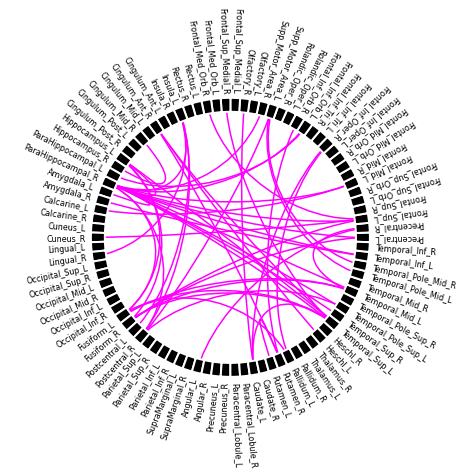

In [5]:
# Load files.
plsfilename = '1B_adossev_static'
cmap = 'cool'

matdata = scipy.io.loadmat(datadir+'pls_conn'+plsfilename+'.mat')
# matdata = scipy.io.loadmat(datadir+plsfilename+'.mat')
con_method = 'pls_connmat'
n_lines = size(find(matdata[con_method]!=0))/2
print '# connections: \t',n_lines
print '# TD / INC conns: \t',size(find(matdata[con_method]==.8))/2 
print '# ASD / DEC conns: \t',size(find(matdata[con_method]==.2))/2 
fig=plt.figure(figsize=(9,8),num=None,dpi=500)
plot_connectivity_circle(matdata[con_method],labels,n_lines=n_lines,fig=fig,
                         colormap=cmap,facecolor='white',textcolor='black',
                         colorbar=0,#vmin=-.65,vmax=.65, # title = ' ', fontsize_title=16,
                         vmin = .1,
                         node_colors=['black'],node_edgecolor=['white'])
fig.savefig(datadir+'plot_'+plsfilename+'.jpg',dpi=300)

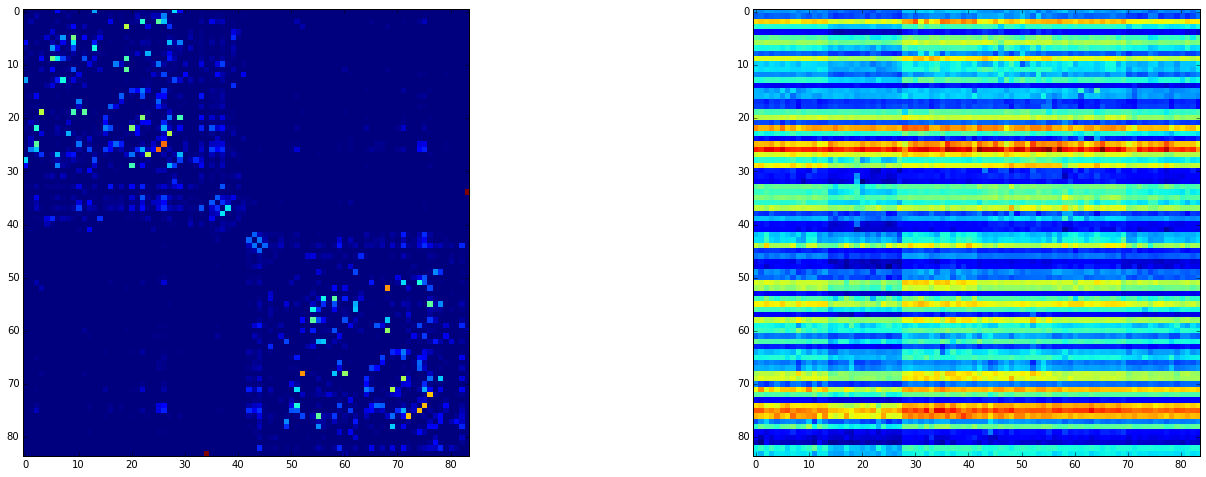

In [97]:
figure(figsize=(24,8));
xindex=np.arange(0,nchan,10);
# labelxN84=[labelnameN84[ix] for ix in xindex]

ax1=subplot(121);

plt.imshow(N84gtMat,interpolation='nearest');
ax1.set_xticks(xindex);
# ax1.set_xticklabels(labelxN84,size=16)
ax1.set_yticks(xindex);
# ax1.set_yticklabels(labelxN84,size=16)

ax2=subplot(122);
plt.imshow(fNchanMat,interpolation='nearest');

ax2.set_xticks(xindex);
# ax2.set_xticklabels(labelxN84,size=16)
ax2.set_yticks(xindex);
# ax2.set_yticklabels(labelxN84,size=16)